*IMPORTING NECESSARY LIBRARIES*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")

*LOADING DATASET*

In [29]:
Train_data=pd.read_csv("C:\VS PROJECTS\GUVI FINAL PROJ\p1_train.csv",names=['f1','f2','Target'])
Test_data=pd.read_csv("C:\VS PROJECTS\GUVI FINAL PROJ\p1_test.csv",names=['f1','f2','Target'])

#checking shapes of dataframes
print(Train_data.shape)
print(Test_data.shape)


(10000, 3)
(5000, 3)
DataFrame does not contain string entries.


*CHECKING FOR SKEWNESS IN DATA*

============== TRAIN DATA SKEWNESS ============


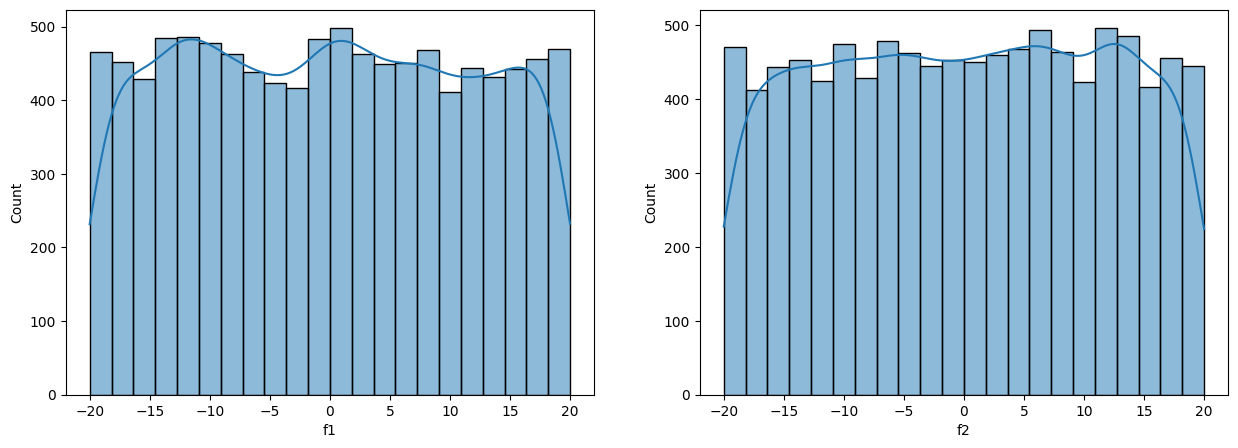

Skew Value for F1_Train data:  0.01931436754085014
Skew Value for F2_Train data:  -0.02006044168270276


============== TEST DATA SKEWNESS ============


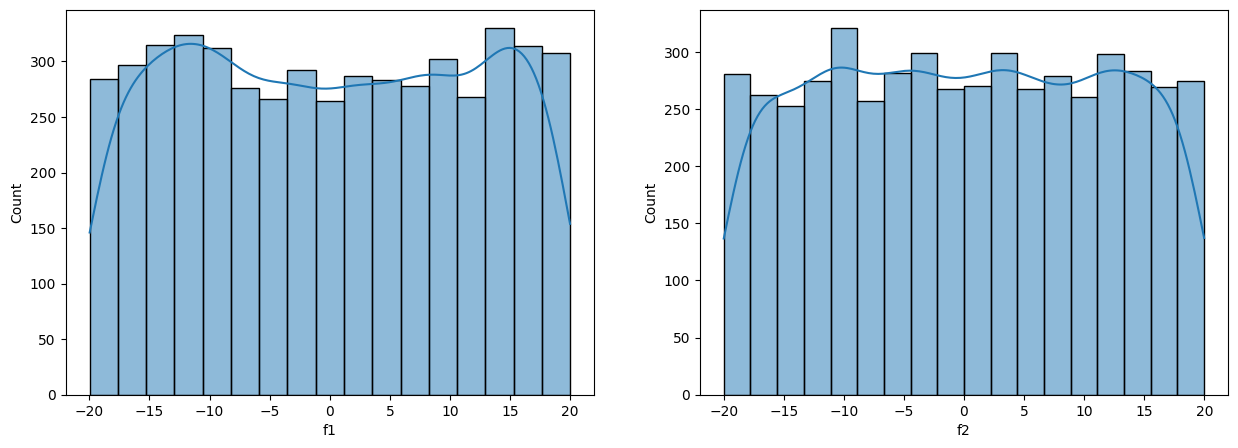

Skew Value for F1_Train data:  0.009496629870054299
Skew Value for F2_Train data:  -0.0011839062400789704


In [26]:
#for Train data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(Train_data['f1'],kde=True)
plt.subplot(1,2,2)
sns.histplot(Train_data['f2'],kde=True)
print("============== TRAIN DATA SKEWNESS ============")
plt.show()
print('Skew Value for F1_Train data: ',Train_data['f1'].skew())
print('Skew Value for F2_Train data: ',Train_data['f2'].skew())

#for Test data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(Test_data['f1'],kde=True)
plt.subplot(1,2,2)
sns.histplot(Test_data['f2'],kde=True)
print("\n\n============== TEST DATA SKEWNESS ============")
plt.show()
print('Skew Value for F1_Train data: ',Test_data['f1'].skew())
print('Skew Value for F2_Train data: ',Test_data['f2'].skew())

*SPLITTING THE DATASET FOR TRAIN AND TEST*

In [31]:
#Training datasets
X_train = Train_data.iloc[:,:-1]
y_train = Train_data.iloc[:,-1]
#Testing datasets
X_test = Test_data.iloc[:,:-1]
y_test = Test_data.iloc[:,-1]



*FEATURE SCALING*

In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

*FUNCTION TO TRAIN THE MODEL*

In [38]:
def liner_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    MAE=mean_absolute_error(y_test,y_pred)
    RMSE=root_mean_squared_error(y_test,y_pred)
    return MAE,RMSE

*EVALUATION METRICS*

In [45]:
#list of values to plot the graph
MAE_list=[]
RMSE_list=[]
#to test the data using model
model_list=[SVR(kernel='linear',C=1),LinearRegression()]
for models in model_list:
    mae,rmse=liner_model(models)
    MAE_list.append(mae)
    RMSE_list.append(rmse) 
    print(f'\n======================== Using {models.__class__.__name__} Model =================================')
    print('ROOT MEAN SQUARED ERROR: ',rmse)
    print("MEAN ABSOLUTE ERROR :",mae)


======================== Using SVR Model =================================
ROOT MEAN SQUARED ERROR:  2.2461356092285754
MEAN ABSOLUTE ERROR : 1.798733432173488

======================== Using LinearRegression Model =================================
ROOT MEAN SQUARED ERROR:  2.246427386752408
MEAN ABSOLUTE ERROR : 1.7990800530982611


*PLOTTING GRAPH*

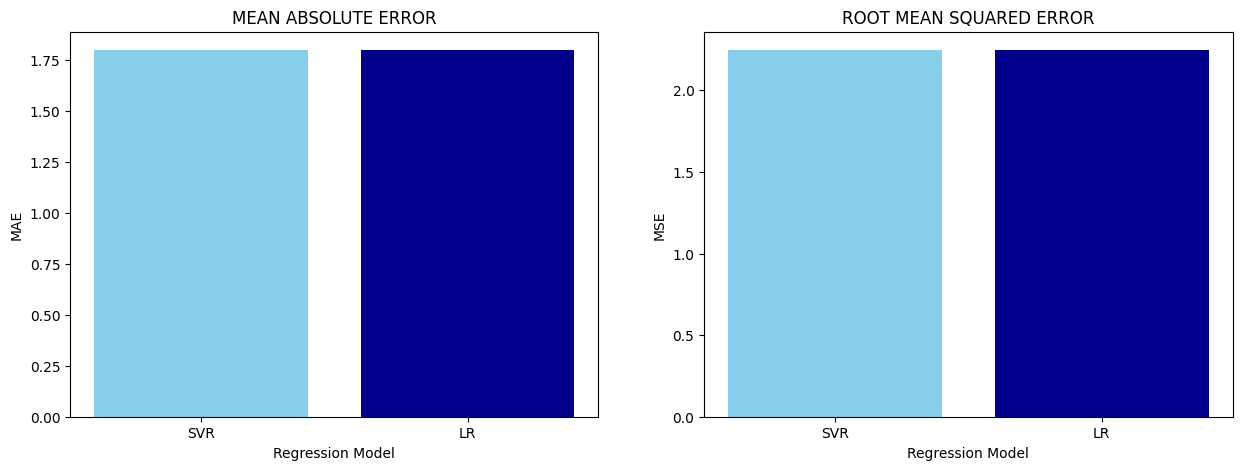

In [52]:
#plot mae graph
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['SVR','LR'],MAE_list,color=['skyblue','darkblue'])
plt.title("MEAN ABSOLUTE ERROR")
plt.xlabel("Regression Model")
plt.ylabel("MAE")
#plot mse graph
plt.subplot(1,2,2)
plt.bar(['SVR','LR'],RMSE_list,color=['skyblue','darkblue'])
plt.title("ROOT MEAN SQUARED ERROR")
plt.xlabel("Regression Model")
plt.ylabel("MSE")
plt.show()